<hr style="margin-bottom: 50px;">
<center>
    <h1 style="margin-top: 0; margin-bottom: 0;">
        <b><u>Decision Tree</u></b>
    </h1>
</center>
<hr style="margin-top: 50px;">


In [1]:
import config, src

import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [2]:
data = src.load_data(config.PROCESSED_DATA_COMBINED_RAP_HIPHOP_FILE)

X_train, X_test, y_train, y_test = src.split_data(data, target_column='music_genre')

class_weight = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train,
)
class_weight = dict(zip(np.unique(y_train), class_weight))

Données chargées avec succès.


In [3]:
dt_classifier = DecisionTreeClassifier(random_state=0, class_weight=class_weight)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={np.int64(0): np.float64(1.0701870734201),
                                     np.int64(1): np.float64(1.0715194776449757),
                                     np.int64(2): np.float64(1.0766130153170432),
                                     np.int64(3): np.float64(1.077421688087687),
                                     np.int64(4): np.float64(1.0980408834453232),
                                     np.int64(5): np.float64(1.0641004505989669),
                                     np.int64(6): np.float64(1.0741942641593165),
                                     np.int64(7): np.float64(0.6427516388681437),
                                     np.int64(8): np.float64(1.06594555913357)},
                       random_state=0)

----------------------------------------------------------------------------------------------------

Global accuracy : 0.534958174119591
Global log loss : 16.64248063339199
Global precision : 0.5226738158458504
Global recall : 0.5204986657764064
Global F1 score : 0.5214096919690919
Global ROC-AUC score : 0.7327593002670838

              Precision    Recall  F1 score
Alternative   0.287632  0.306435  0.296736
Anime         0.664640  0.666667  0.665652
Blues         0.420248  0.438684  0.429268
Classical     0.786008  0.759443  0.772497
Country       0.466102  0.457909  0.461969
Electronic    0.476578  0.489540  0.482972
Jazz          0.439484  0.445674  0.442557
Rap/Hip-Hop   0.755735  0.709959  0.732132
Rock          0.407637  0.410177  0.408903

----------------------------------------------------------------------------------------------------


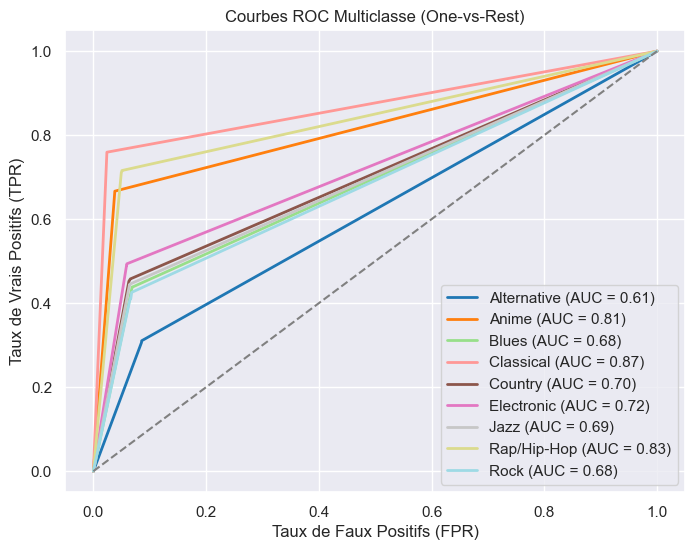

----------------------------------------------------------------------------------------------------


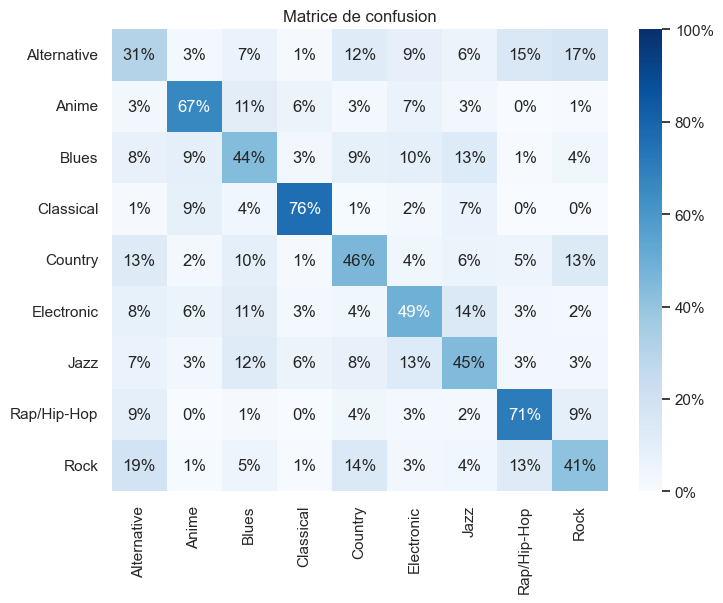

----------------------------------------------------------------------------------------------------


In [4]:
src.evaluate_model(dt_classifier, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)

In [5]:
params = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [5, 10, 30, 50],
    'min_samples_leaf': [10, 20, 30, 50],
}

In [ ]:
cv_strat = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

rs_dt_classifier = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=0, class_weight=class_weight),
    param_distributions=params,
    n_iter=40,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv_strat,
    verbose=1,
    random_state=0,
    )
rs_dt_classifier.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight={np.int64(0): np.float64(1.0701870734201),
                                                                  np.int64(1): np.float64(1.0715194776449757),
                                                                  np.int64(2): np.float64(1.0766130153170432),
                                                                  np.int64(3): np.float64(1.077421688087687),
                                                                  np.int64(4): np.float64(1.0980408834453232),
                                                                  np.int64(5): np.float64(1.0641004505989669),
                                                                  np.int64(6): np.float64(1.0741942641593165),
                                                                  np.int64(7): np.float64(0.6427516388681437),
                                                                  np.int64(8): np.float64(1.06594555913357)},
                                                    random_state=0),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'min_samples_leaf': [10, 20, 30, 50],
                                        'min_samples_split': [5, 10, 30, 50]},
                   random_state=0, scoring='accuracy', verbose=1)

In [7]:
src.save_model(rs_dt_classifier, 'rs_dt_classifier')

Modèle et ses métadonnées sauvegardées dans : /Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/models


Meilleure valeur de min_samples_split : 5
Meilleure valeur de min_samples_leaf : 30
Meilleure valeur de max_depth : 15


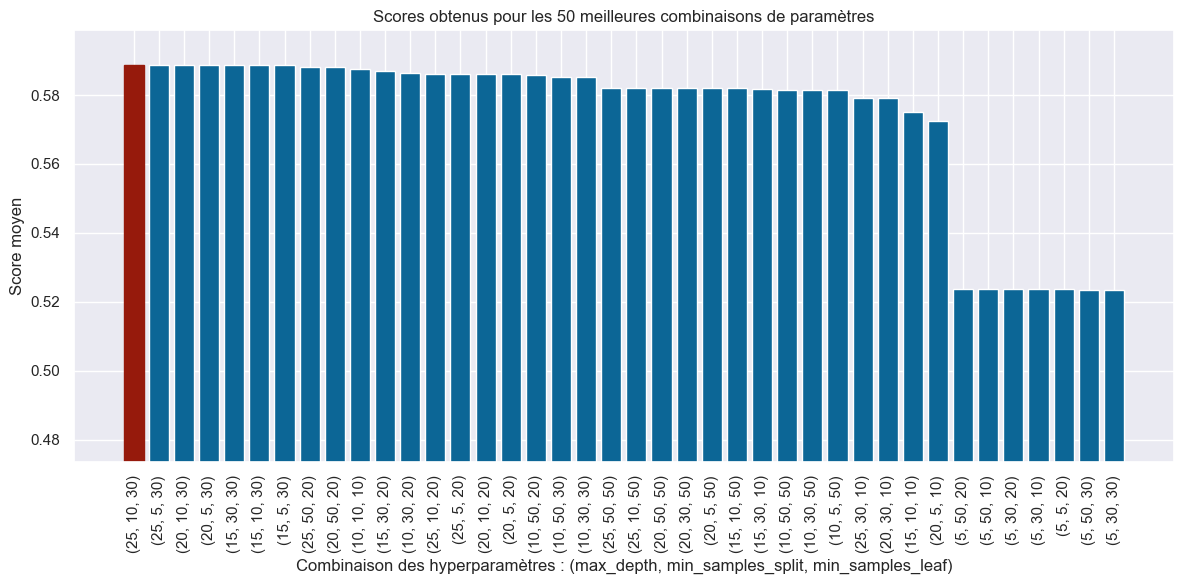

In [8]:
best_params = src.plot_gridsearch(rs_dt_classifier, params)

In [9]:
dt_classifier = DecisionTreeClassifier(
    random_state=0,
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    class_weight=class_weight,
    )
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={np.int64(0): np.float64(1.0701870734201),
                                     np.int64(1): np.float64(1.0715194776449757),
                                     np.int64(2): np.float64(1.0766130153170432),
                                     np.int64(3): np.float64(1.077421688087687),
                                     np.int64(4): np.float64(1.0980408834453232),
                                     np.int64(5): np.float64(1.0641004505989669),
                                     np.int64(6): np.float64(1.0741942641593165),
                                     np.int64(7): np.float64(0.6427516388681437),
                                     np.int64(8): np.float64(1.06594555913357)},
                       max_depth=15, min_samples_leaf=30, min_samples_split=5,
                       random_state=0)

----------------------------------------------------------------------------------------------------

Global accuracy : 0.6081792832799752
Global log loss : 2.398924408232965
Global precision : 0.5989116115764319
Global recall : 0.5965302294177046
Global F1 score : 0.5958178612754085
Global ROC-AUC score : 0.8961843904232522

              Precision    Recall  F1 score
Alternative   0.381764  0.389173  0.385432
Anime         0.723849  0.703252  0.713402
Blues         0.527655  0.475573  0.500262
Classical     0.832657  0.816103  0.824297
Country       0.556595  0.550416  0.553488
Electronic    0.569930  0.511506  0.539140
Jazz          0.476190  0.513078  0.493947
Rap/Hip-Hop   0.825864  0.751310  0.786825
Rock          0.495700  0.658359  0.565566

----------------------------------------------------------------------------------------------------


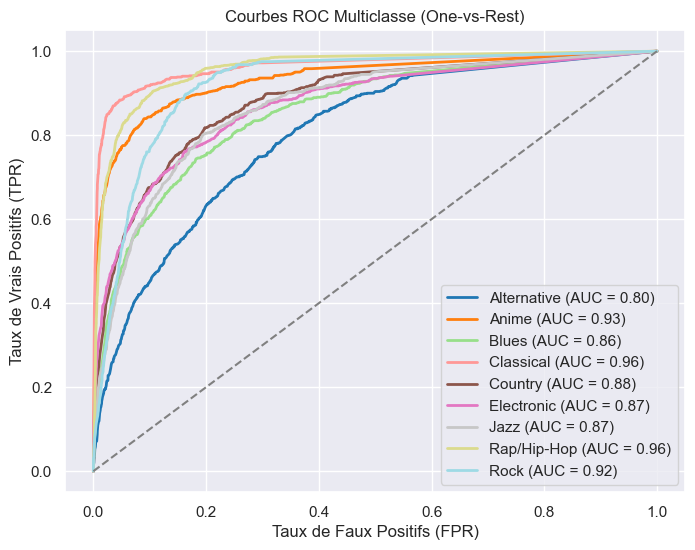

----------------------------------------------------------------------------------------------------


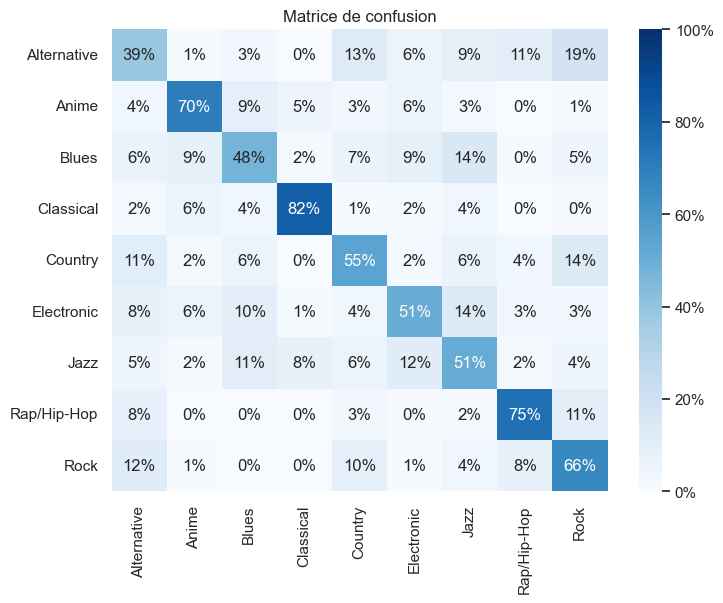

----------------------------------------------------------------------------------------------------


In [10]:
src.evaluate_model(dt_classifier, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)

In [11]:
src.save_model(dt_classifier, 'dt_classifier')

Modèle et ses métadonnées sauvegardées dans : /Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/models


---